In [ ]:
'''
How many 5G antennas can share the same elastic optical link? Can we predict when they will reach the 
fiber limit? To answer those questions, I obtained datasets from Big Data Italia Telecom [1] in order 
to analyze the CDR (call detailed records) from the city of Milan. With them, I am able to analyze traffic 
from cell towers to answer the first question and deliver a prediction model based on neural networks to 
answer the second question. The main purpose of this project is to demonstrate my data science skills and a
portion of my research on 5G networks.

Links:
[1]: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EGZHFV - Telecommunications dataset
[2]: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/QJWLFU - Coordinates
[3]: https://www.opencellid.org/#zoom=16&lat=37.77889&lon=-122.41942 - Cell towers coordinates
[4]: https://cordis.europa.eu/docs/projects/cnect/9/317669/080/deliverables/001-METISD11v1pdf.pdf
[5]: https://www.nature.com/articles/sdata201555
[6]: https://www.3gpp.org/DynaReport/TDocExMtg--R3-93b--31676.htm - Report 162102
'''

In [14]:
# Scenario and contextualization

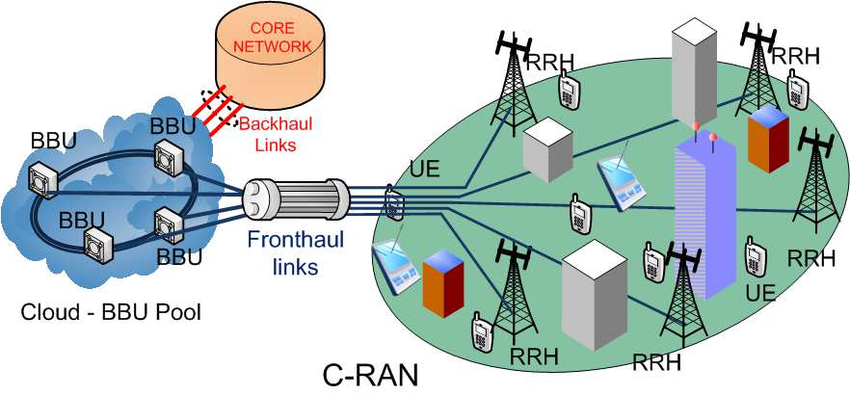

In [15]:
from IPython.display import Image
Image("01.png")

# Source https://www.researchgate.net/figure/Cloud-RAN-architecture_fig1_282266765

'''
In the next generation of mobile networks (5G), the processing of most baseband functions will be shifted from antennas (RRH-Radio Remote Head) to the cloud, where the processing will be centralized by BBU (baseband units) pools. The network that connects Cloud and RRH's is called Fronthaul, which is composed of optical networks. The architecture is called C-RAN (Cloud- Radio Access Network). The question of how many antennas or RRH's can share the same link is truly relevant due to how it implicates how the topology will be conceived. The second question becomes relevant due to the necessity of resizing the network before the demands reach the fiber boundary and lack resources.
'''

In [17]:
## Let's play!

In [186]:
# Libraries
import pandas as pd
from random import randint
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import skew

In [24]:
# Loading the dataset day 1
dataset_milao_01 = pd.read_csv('/home/nilton/Arquivos/Datasets/dataverse_files/sms-call-internet-mi-2013-11-01.txt'
                               ,sep = '\t', header = None)

In [25]:
dataset_milao_01.columns = ['Square_id', 'Time_Interval', 'Country_code', 'SMS_in', 
                'SMS_out', 'Call-in', 'Call-out', 'Internet']
# Extracted from [5]

In [20]:
## let's take a look

In [26]:
dataset_milao_01.head()

,Square_id,Time_Interval,Country_code,SMS_in,SMS_out,Call-in,Call-out,Internet
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963


# Cleaning Stage

In [27]:
# We are handling Internet, so SMS_in, SMS_out, Call-in, Call-out will be excluded

In [28]:
df1 = dataset_milao_01.drop(['SMS_in', 'SMS_out', 'Call-in', 'Call-out'], axis = 1)

In [29]:
df1.head()

,Square_id,Time_Interval,Country_code,Internet
0,1,1383260400000,0,NaN
1,1,1383260400000,39,11.028366
2,1,1383261000000,0,NaN
3,1,1383261000000,33,0.026137
4,1,1383261000000,39,11.100963


'''
As we can see in the first two lines, two records were triggered at the same time. It means there are other events different from the Internet triggering the CDR. Therefore, they must be dropped to focus only on Internet events. Another fact is that there are different country codes from Italy’s. That could be calls and SMS messages from other countries to Italy. In this work, I will only keep Internet data generated in Italy.
''' 

In [30]:
# Italy has 39 as country code
df2 = df1[df1['Country_code'] == 39]

In [31]:
df2.head()

,Square_id,Time_Interval,Country_code,Internet
1,1,1383260400000,39,11.028366
4,1,1383261000000,39,11.100963
6,1,1383261600000,39,10.892771
8,1,1383262200000,39,8.622425
10,1,1383262800000,39,8.009927


In [32]:
df2.tail()

,Square_id,Time_Interval,Country_code,Internet
4842614,9999,1383343800000,39,21.370823
4842617,9999,1383344400000,39,21.788302
4842619,9999,1383345000000,39,19.047994
4842622,9999,1383345600000,39,16.453566
4842623,9999,1383346200000,39,21.283461


In [34]:
# Verifying NaN objects
df2.isnull().values.any()

True

In [38]:
# Showing the sum of null values by Column
for i in df2.columns:
    print('Column: {} - Value: {}'.format(i, df2[i].isnull().sum()))

Column: Square_id - Value: 0
Column: Time_Interval - Value: 0
Column: Country_code - Value: 0
Column: Internet - Value: 35


In [39]:
# Here, I will use interpolation as a method of replacing due to the Internet column is related with timestamp,
# which means, time series.

In [45]:
df2['Internet'].interpolate(method ='linear')

1          11.028366
4          11.100963
6          10.892771
8           8.622425
10          8.009927
             ...    
4842614    21.370823
4842617    21.788302
4842619    19.047994
4842622    16.453566
4842623    21.283461
Name: Internet, Length: 1439981, dtype: float64

In [46]:
# Verifying the sum of null values by Column
for i in df2.columns:
    print('Column: {} - Value: {}'.format(i, df2[i].isnull().sum()))

Column: Square_id - Value: 0
Column: Time_Interval - Value: 0
Column: Country_code - Value: 0
Column: Internet - Value: 0


In [47]:
df2.isnull().values.any()

False

In [48]:
df2

,Square_id,Time_Interval,Country_code,Internet
1,1,1383260400000,39,11.028366
4,1,1383261000000,39,11.100963
6,1,1383261600000,39,10.892771
8,1,1383262200000,39,8.622425
10,1,1383262800000,39,8.009927
...,...,...,...,...
4842614,9999,1383343800000,39,21.370823
4842617,9999,1383344400000,39,21.788302
4842619,9999,1383345000000,39,19.047994
4842622,9999,1383345600000,39,16.453566


# Exploratory Analysis

In [49]:
# Before keep moving, we need to save the progress in case of any break.

In [50]:
df2.to_csv('df2.csv')

In [76]:
# As it can be seen in the paper[5], one register is made when one connection lasts for 15 min or transfers 
# more than 5MB. We have to transform it before analysis. Second the METIS report[4], the traffic of 5G will
# be 1000 higher than 4g. Therefore, we create a column Traffic_MB multiplying Internet by 5000(5MB * 1000)
df2['Traffic_MB'] = df2['Internet']*5000

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
df2.head()

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB
1,1,1383260400000,39,11.028366,55141.831908
4,1,1383261000000,39,11.100963,55504.817257
6,1,1383261600000,39,10.892771,54463.853014
8,1,1383262200000,39,8.622425,43112.122955
10,1,1383262800000,39,8.009927,40049.637312


In [ ]:
# Let's create a column Traffic_Gbps. It's necessary to convert MB to Gb. However, we have a time slot of 
# 10 minutes [5]. Then, to find out the mean Gbps in that time slot, we also must divide by 600 seconds 
# (10 minutes).

In [80]:
df2['Traffic_Gbps'] = df2['Traffic_MB']/(125*600)

/home/nilton/anaconda3/envs/Jedi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
# Let start with a statistical analysis
df2['Traffic_MB'].describe()

count    1.439981e+06
mean     2.855775e+05
std      4.709116e+05
min      4.849937e+00
25%      5.333864e+04
50%      1.345267e+05
75%      3.126006e+05
max      2.497803e+07
Name: Traffic_MB, dtype: float64

In [81]:
df2['Traffic_Gbps'].describe()

count    1.439981e+06
mean     3.807700e+00
std      6.278821e+00
min      6.466582e-05
25%      7.111819e-01
50%      1.793690e+00
75%      4.168008e+00
max      3.330403e+02
Name: Traffic_Gbps, dtype: float64

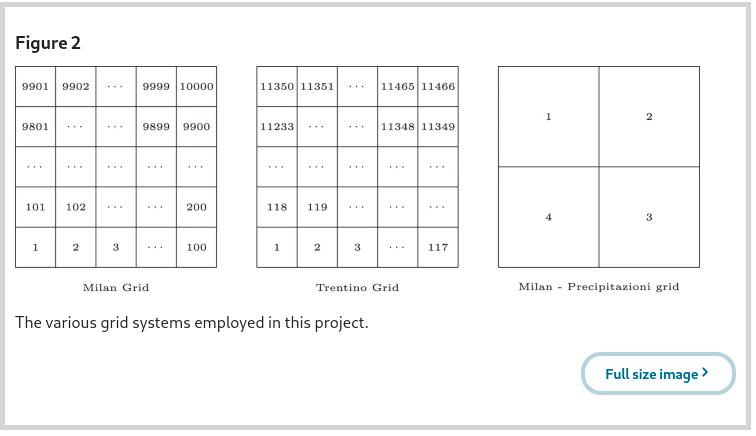

In [52]:
# The Internet is also associated with different squares or regions. So, let's take a look close to two of them.
# The largest and the smallest.
Image('02.png')

In [154]:
# Getting the square_id of the largest mean. 
largest = df2.groupby('Square_id')['Traffic_Gbps'].mean().nlargest(1).reset_index()['Square_id'][0]

In [159]:
df_largest = df2[df2['Square_id'] == largest]

In [160]:
df_largest.head()

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps
2131620,5161,1383260400000,39,374.286303,1.871432e+06,24.952420
2131625,5161,1383261000000,39,365.309544,1.826548e+06,24.353970
2131635,5161,1383261600000,39,416.397668,2.081988e+06,27.759845
2131643,5161,1383262200000,39,349.432457,1.747162e+06,23.295497
2131651,5161,1383262800000,39,268.562137,1.342811e+06,17.904142


In [161]:
df_largest['Internet'].describe()

count     144.000000
mean     1618.009801
std      1609.482710
min       104.789653
25%       182.396216
50%       928.094385
75%      3178.832735
max      4995.605219
Name: Internet, dtype: float64

50% of the number of registers are below 928. The third quartile reaches 3178 registers, which means in a specific time of the day, there is a great peak of traffic. The IQR is 2996.434. It means a variable dataset.

In [162]:
df_largest['Traffic_MB'].describe()

count    1.440000e+02
mean     8.090049e+06
std      8.047414e+06
min      5.239483e+05
25%      9.119811e+05
50%      4.640472e+06
75%      1.589416e+07
max      2.497803e+07
Name: Traffic_MB, dtype: float64

In [163]:
df_largest['Traffic_Gbps'].describe()

count    144.000000
mean     107.867320
std      107.298847
min        6.985977
25%       12.159748
50%       61.872959
75%      211.922182
max      333.040348
Name: Traffic_Gbps, dtype: float64

50% of the day use below 61 Gbps. Then, it hits a peak of 333 Gbps!

<AxesSubplot:xlabel='Traffic_Gbps'>

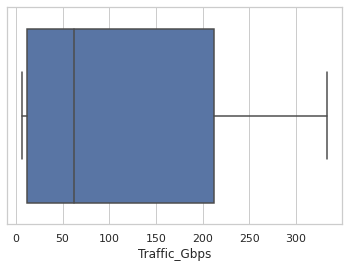

In [185]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_largest["Traffic_Gbps"])

Although reaching more than 300 Gbps and having a median between 50 and 70, these numbers are not considered outliers by the boxplot above.
Outlier can be calculated by Mean +- 3*Standard deviation. Then, to be considered outliers, the traffic must be higher than 429.73 and lesser than −214.01 (which is impossible).
The median is close to the first quartile. It means the distribution is positive asymmetric (skewed).

<AxesSubplot:xlabel='Traffic_Gbps', ylabel='Count'>

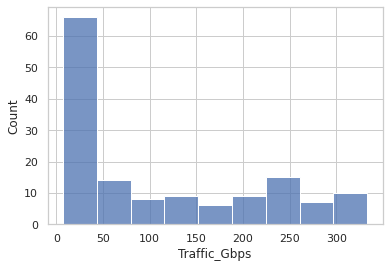

In [165]:
sns.histplot(data=df_largest, x="Traffic_Gbps")

The histogram confirms the skew. We can see the histogram tail on the right side of the peak

In [171]:
# It confirms the distribution is moderately skewed.
df_largest['Traffic_Gbps'].skew()

0.6992267205866758

In [166]:
np.median(df_largest['Traffic_Gbps'])

61.872959030919716

The mean is 107.867320. When the mean is highest than median means the distribution is positive asymmetric.

In [ ]:
## Now it's time to see the behavior through the time. However, our time is in Timestamp. As we can extract from 
# the paper, every CDR is generated in a time tinterval of 10 minutes. Starting from 00:00 to 23:50, we will have 144 time slots.
# Lets convert the time!


In [115]:
# Let's test if the timestamp is correct!

datetime.fromtimestamp(df_square['Time_Interval'].values[0])

ValueError: year 45803 is out of range

In [92]:
'''
As we can see, the timestamp is invalid. We have to consider the day starting 0.0 and ending with the last 
time slot at 23.5. So, to every 0.6 he have one hour.
'''

In [121]:
def convert_time(dataset2):
    dataset = dataset2.copy()
    minuto = 0.0
    hora = 0.0
    horario = 0.0
    anterior = dataset.iloc[0,0]
    for i in range(0,dataset.shape[0]):
        if dataset.iloc[i,0] == anterior:
            horario = minuto + hora
            dataset.iat[i,1] = horario
            minuto += 0.10
            if minuto == 0.60:
                minuto = 0.0
                hora += 1.0
        else:
            horario = 0.0
            minuto = 0.0
            hora = 0.0
            dataset.iat[i,1] = horario
            minuto += 0.10
        anterior = dataset.iloc[i,0]
    return dataset

In [167]:
df_largest = convert_time(df_largest)

In [169]:
df_largest.reset_index()

,index,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps
0,2131620,5161,0.0,39,374.286303,1.871432e+06,24.952420
1,2131625,5161,0.1,39,365.309544,1.826548e+06,24.353970
2,2131635,5161,0.2,39,416.397668,2.081988e+06,27.759845
3,2131643,5161,0.3,39,349.432457,1.747162e+06,23.295497
4,2131651,5161,0.4,39,268.562137,1.342811e+06,17.904142
...,...,...,...,...,...,...,...
139,2133886,5161,23.1,39,647.054746,3.235274e+06,43.136983
140,2133897,5161,23.2,39,668.884704,3.344424e+06,44.592314
141,2133904,5161,23.3,39,741.440482,3.707202e+06,49.429365
142,2133910,5161,23.4,39,582.506444,2.912532e+06,38.833763


Text(0, 0.5, 'Traffic in Gbps')

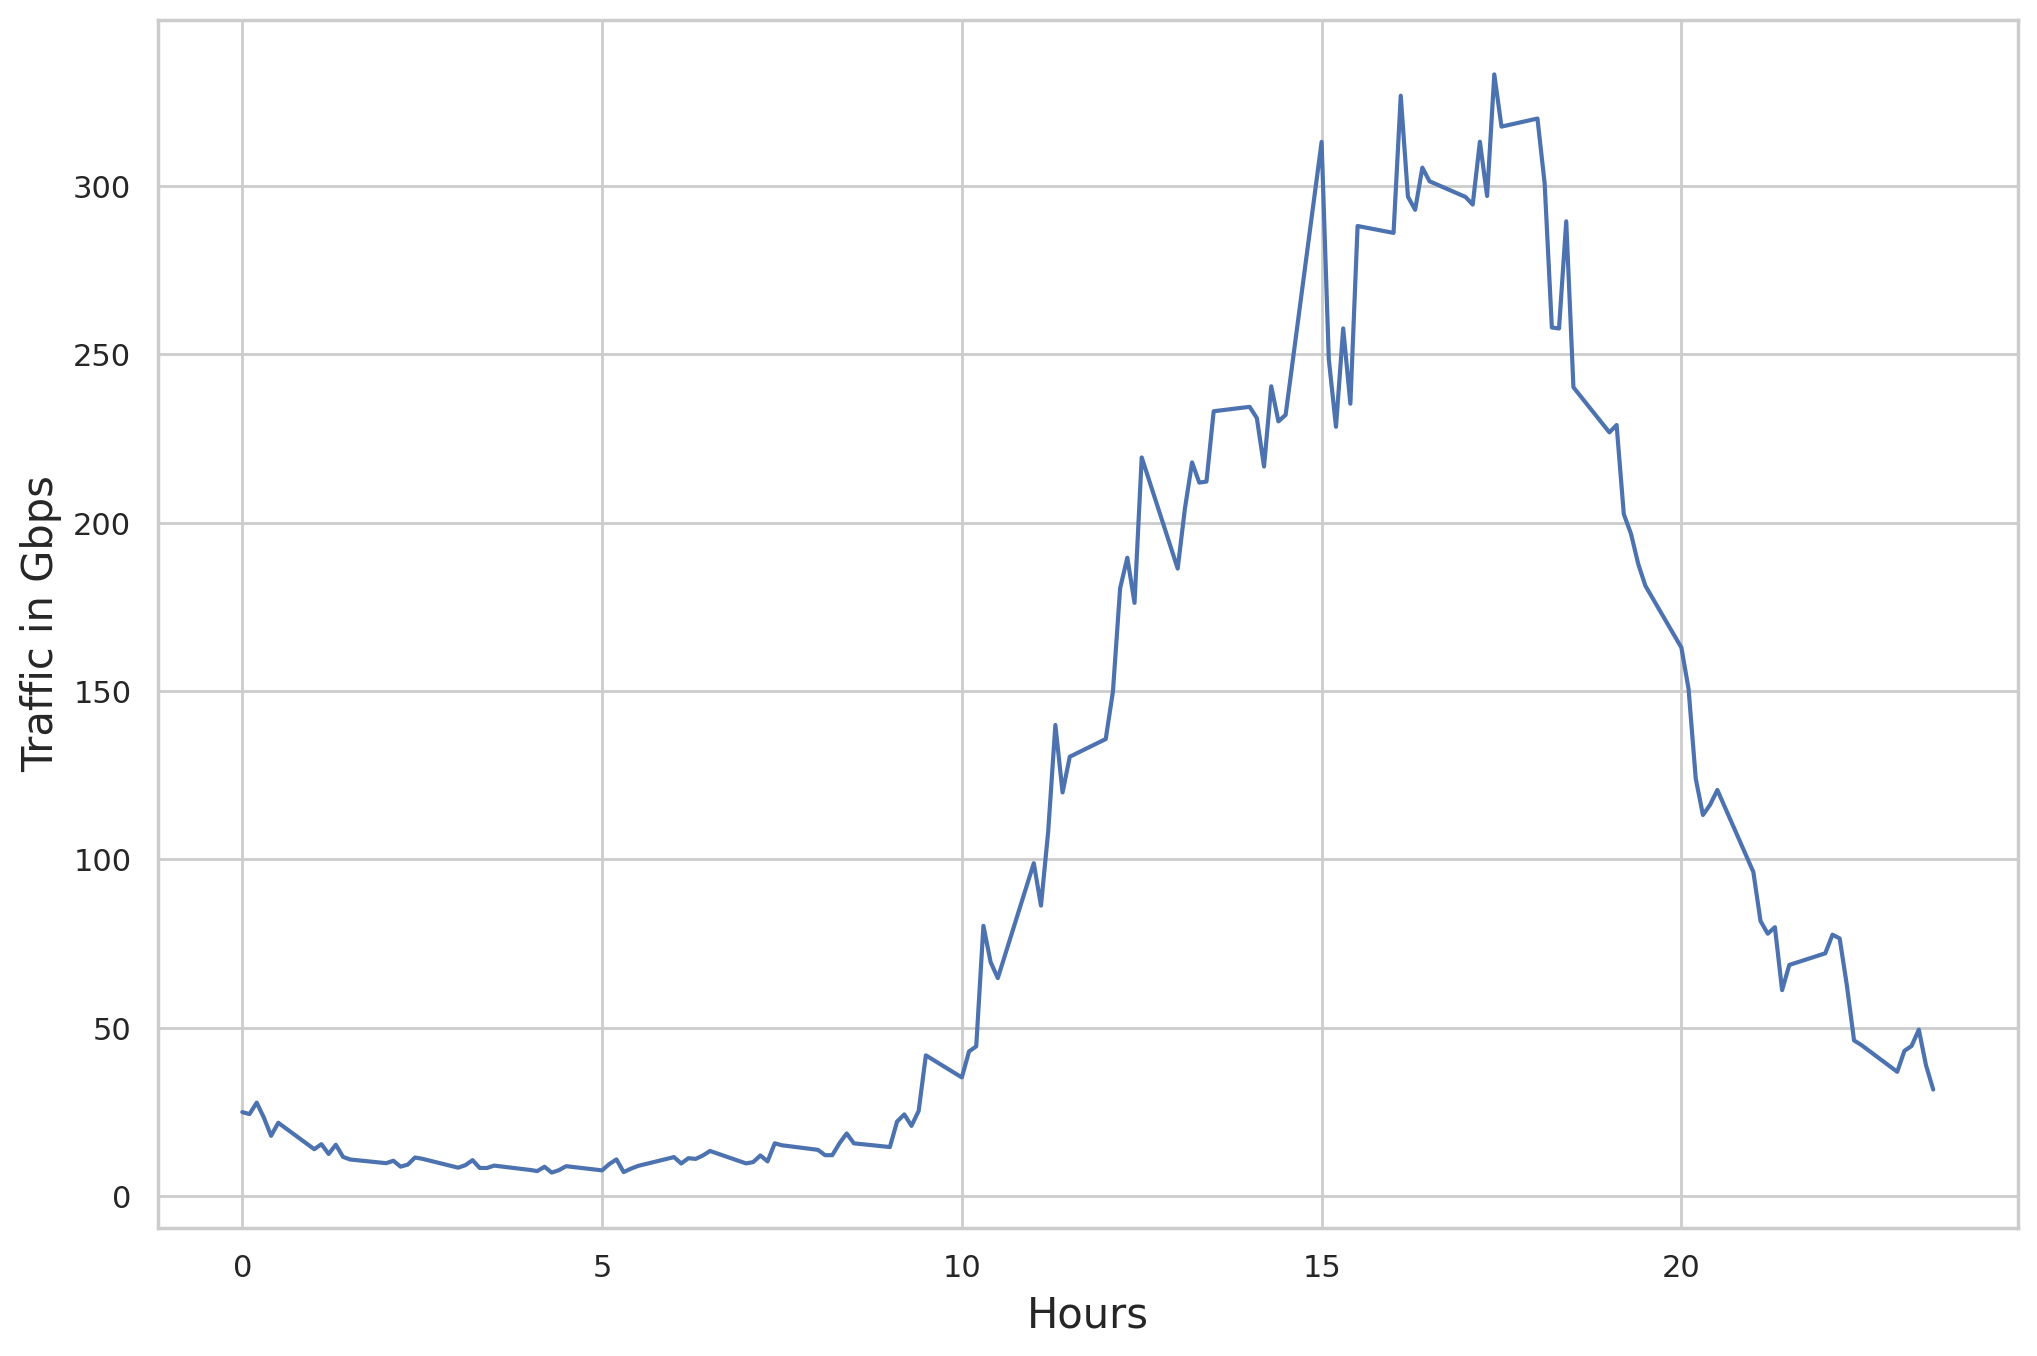

In [170]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(df_largest['Time_Interval'], df_largest['Traffic_Gbps'])
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)


This graph shows a great variation between 10:00 and 20:00, reaching a peak between 15h and 20h. It may mean the square is in a workplace region.

In [172]:
smallest = df2.groupby('Square_id')['Traffic_Gbps'].mean().nsmallest(1).reset_index()['Square_id'][0]

In [173]:
df_smallest = df2[df2['Square_id'] == smallest]

In [176]:
df_smallest.reset_index()

,index,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps
0,821108,2801,1383260400000,39,0.353217,1766.085863,0.023548
1,821110,2801,1383261000000,39,0.429970,2149.848392,0.028665
2,821112,2801,1383261600000,39,0.288691,1443.453161,0.019246
3,821114,2801,1383262200000,39,0.276741,1383.706196,0.018449
4,821118,2801,1383262800000,39,0.313741,1568.704768,0.020916
...,...,...,...,...,...,...,...
139,821402,2801,1383343800000,39,0.332079,1660.396067,0.022139
140,821403,2801,1383344400000,39,0.336882,1684.411512,0.022459
141,821404,2801,1383345000000,39,0.284435,1422.175614,0.018962
142,821405,2801,1383345600000,39,0.339948,1699.738904,0.022663


In [178]:
df_smallest['Traffic_Gbps'].describe()

count    144.000000
mean       0.023137
std        0.007572
min        0.012119
25%        0.016550
50%        0.022672
75%        0.027374
max        0.052226
Name: Traffic_Gbps, dtype: float64

<AxesSubplot:xlabel='Traffic_Gbps'>

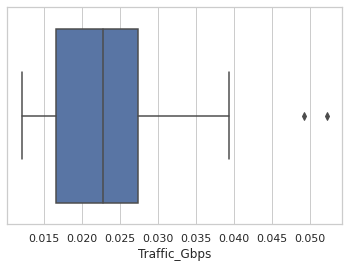

In [182]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_smallest["Traffic_Gbps"])

In this time we can see outliers in the boxplot above. Although the boxplot indicate a negative asymmetric distribution. I have interesting findings.

In [183]:
np.median(df_smallest['Traffic_Gbps'])

0.022671828519403196

In [184]:
np.mean(df_smallest['Traffic_Gbps'])

0.023136943053824507

We have a mean higher that median, which means a positive asymmetric (skew).

In [188]:
skew(df_smallest['Traffic_Gbps'])

0.788650378899964

The skew confirms that is a positive skew.

<AxesSubplot:xlabel='Traffic_Gbps', ylabel='Count'>

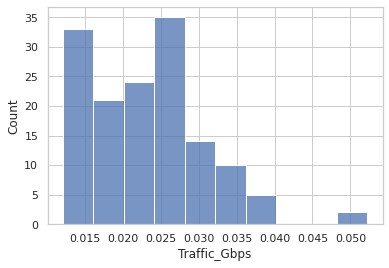

In [189]:
sns.histplot(data=df_smallest, x="Traffic_Gbps")

That's the reason we need more resources to get any conclusion. Only by the boxplot, we would have concluded a negative skew. However, the histogram and the skew number confirm the inverse.

In [190]:
df_smallest = convert_time(df_smallest)

Text(0, 0.5, 'Traffic in Gbps')

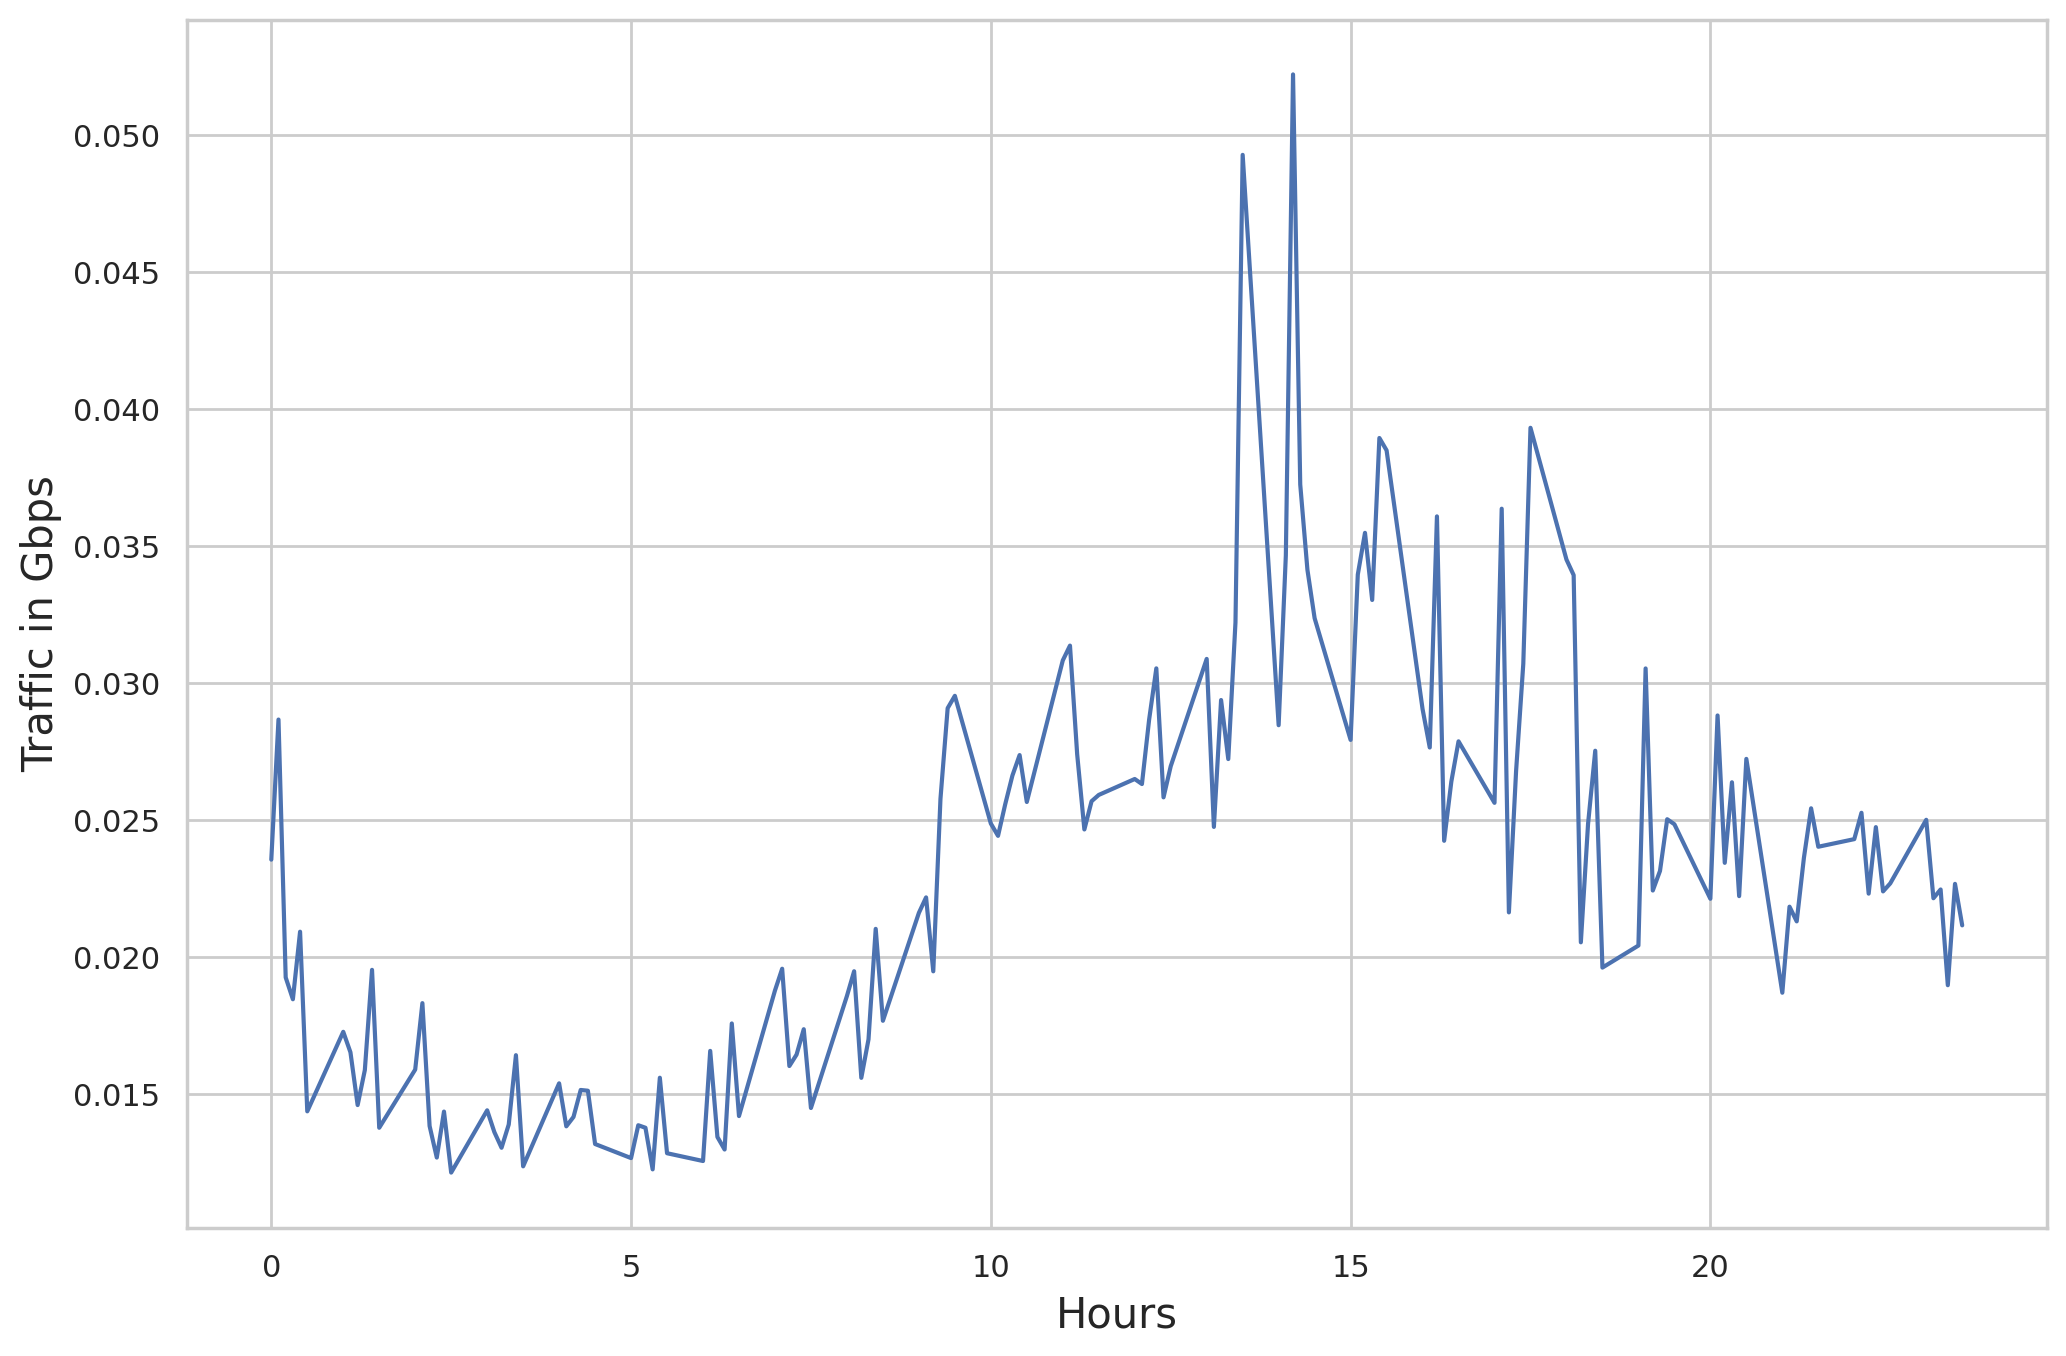

In [192]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(df_smallest['Time_Interval'], df_smallest['Traffic_Gbps'])
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)

Similar behavior to the highest. However, it tends to be a distant place from the city centre or business centre due to the difference of traffic. 

So far, we analyzed the behavior of data from square. However, these data is represented in radio form and must be sample (digitalized) in I/Q (In phase and Quadrature) to traverse the optical fiber. Since the releasing of C-RAN, there were only one form to do it. On the other hand, this option is very wasteful and needs too much bandwidth from fronthaul, not to mention that the variation of bandwidth only happens through the variation of settings of antennas, instead of user data. To address the problem, more options have been created. Now we have options 1,2,3,4,5,6,7-1,7-2,7-3 and 8. Only options from 1 to 6 allows variation of bandwidth with data user. Therefore we will use the formula extracted from [6] to convert the bandwidth required in fronthaul.

In [ ]:
 # Let's implement teh formula of convertion

In [195]:
fronthaul_band = lambda x: x*(100/20)*(8/6)*(8/2) # X in Mbps

In [198]:
#Lets create a formula to convert Gbps to Mbps and create a new columns to both datasets

In [199]:
Gbps_Mbps = lambda x: x*1000

In [200]:
df_largest['Traffic_Mbps'] = list(map(Gbps_Mbps,df_largest['Traffic_Gbps']))

In [201]:
df_largest

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps,Traffic_Mbps
2131620,5161,0.0,39,374.286303,1.871432e+06,24.952420,24952.420221
2131625,5161,0.1,39,365.309544,1.826548e+06,24.353970,24353.969591
2131635,5161,0.2,39,416.397668,2.081988e+06,27.759845,27759.844529
2131643,5161,0.3,39,349.432457,1.747162e+06,23.295497,23295.497166
2131651,5161,0.4,39,268.562137,1.342811e+06,17.904142,17904.142497
...,...,...,...,...,...,...,...
2133886,5161,23.1,39,647.054746,3.235274e+06,43.136983,43136.983093
2133897,5161,23.2,39,668.884704,3.344424e+06,44.592314,44592.313569
2133904,5161,23.3,39,741.440482,3.707202e+06,49.429365,49429.365443
2133910,5161,23.4,39,582.506444,2.912532e+06,38.833763,38833.762907


In [202]:
df_smallest['Traffic_Mbps'] = list(map(Gbps_Mbps,df_smallest['Traffic_Gbps']))

In [203]:
df_smallest

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps,Traffic_Mbps
821108,2801,0.0,39,0.353217,1766.085863,0.023548,23.547812
821110,2801,0.1,39,0.429970,2149.848392,0.028665,28.664645
821112,2801,0.2,39,0.288691,1443.453161,0.019246,19.246042
821114,2801,0.3,39,0.276741,1383.706196,0.018449,18.449416
821118,2801,0.4,39,0.313741,1568.704768,0.020916,20.916064
...,...,...,...,...,...,...,...
821402,2801,23.1,39,0.332079,1660.396067,0.022139,22.138614
821403,2801,23.2,39,0.336882,1684.411512,0.022459,22.458820
821404,2801,23.3,39,0.284435,1422.175614,0.018962,18.962342
821405,2801,23.4,39,0.339948,1699.738904,0.022663,22.663185


In [204]:
df_largest['Traffic_fronthaul'] = list(map(fronthaul_band,df_largest['Traffic_Mbps']))

In [205]:
df_smallest['Traffic_fronthaul'] = list(map(fronthaul_band,df_smallest['Traffic_Mbps']))

In [206]:
df_largest

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul
2131620,5161,0.0,39,374.286303,1.871432e+06,24.952420,24952.420221,6.653979e+05
2131625,5161,0.1,39,365.309544,1.826548e+06,24.353970,24353.969591,6.494392e+05
2131635,5161,0.2,39,416.397668,2.081988e+06,27.759845,27759.844529,7.402625e+05
2131643,5161,0.3,39,349.432457,1.747162e+06,23.295497,23295.497166,6.212133e+05
2131651,5161,0.4,39,268.562137,1.342811e+06,17.904142,17904.142497,4.774438e+05
...,...,...,...,...,...,...,...,...
2133886,5161,23.1,39,647.054746,3.235274e+06,43.136983,43136.983093,1.150320e+06
2133897,5161,23.2,39,668.884704,3.344424e+06,44.592314,44592.313569,1.189128e+06
2133904,5161,23.3,39,741.440482,3.707202e+06,49.429365,49429.365443,1.318116e+06
2133910,5161,23.4,39,582.506444,2.912532e+06,38.833763,38833.762907,1.035567e+06


In [207]:
df_smallest

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul
821108,2801,0.0,39,0.353217,1766.085863,0.023548,23.547812,627.941640
821110,2801,0.1,39,0.429970,2149.848392,0.028665,28.664645,764.390539
821112,2801,0.2,39,0.288691,1443.453161,0.019246,19.246042,513.227791
821114,2801,0.3,39,0.276741,1383.706196,0.018449,18.449416,491.984425
821118,2801,0.4,39,0.313741,1568.704768,0.020916,20.916064,557.761695
...,...,...,...,...,...,...,...,...
821402,2801,23.1,39,0.332079,1660.396067,0.022139,22.138614,590.363046
821403,2801,23.2,39,0.336882,1684.411512,0.022459,22.458820,598.901871
821404,2801,23.3,39,0.284435,1422.175614,0.018962,18.962342,505.662441
821405,2801,23.4,39,0.339948,1699.738904,0.022663,22.663185,604.351610


In [ ]:
# Now, we need to transform the Traffic_fronthaul in Gbps

In [208]:
Mbps_Gbps = lambda x: x/1000

In [211]:
df_largest['Fronthaul_Gbps'] = list(map(Mbps_Gbps,df_largest['Traffic_fronthaul']))

In [212]:
df_smallest['Fronthaul_Gbps'] = list(map(Mbps_Gbps,df_smallest['Traffic_fronthaul']))

In [213]:
df_largest

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul,Fronthaul_Gbps
2131620,5161,0.0,39,374.286303,1.871432e+06,24.952420,24952.420221,6.653979e+05,665.397873
2131625,5161,0.1,39,365.309544,1.826548e+06,24.353970,24353.969591,6.494392e+05,649.439189
2131635,5161,0.2,39,416.397668,2.081988e+06,27.759845,27759.844529,7.402625e+05,740.262521
2131643,5161,0.3,39,349.432457,1.747162e+06,23.295497,23295.497166,6.212133e+05,621.213258
2131651,5161,0.4,39,268.562137,1.342811e+06,17.904142,17904.142497,4.774438e+05,477.443800
...,...,...,...,...,...,...,...,...,...
2133886,5161,23.1,39,647.054746,3.235274e+06,43.136983,43136.983093,1.150320e+06,1150.319549
2133897,5161,23.2,39,668.884704,3.344424e+06,44.592314,44592.313569,1.189128e+06,1189.128362
2133904,5161,23.3,39,741.440482,3.707202e+06,49.429365,49429.365443,1.318116e+06,1318.116412
2133910,5161,23.4,39,582.506444,2.912532e+06,38.833763,38833.762907,1.035567e+06,1035.567011


In [214]:
df_smallest

,Square_id,Time_Interval,Country_code,Internet,Traffic_MB,Traffic_Gbps,Traffic_Mbps,Traffic_fronthaul,Fronthaul_Gbps
821108,2801,0.0,39,0.353217,1766.085863,0.023548,23.547812,627.941640,0.627942
821110,2801,0.1,39,0.429970,2149.848392,0.028665,28.664645,764.390539,0.764391
821112,2801,0.2,39,0.288691,1443.453161,0.019246,19.246042,513.227791,0.513228
821114,2801,0.3,39,0.276741,1383.706196,0.018449,18.449416,491.984425,0.491984
821118,2801,0.4,39,0.313741,1568.704768,0.020916,20.916064,557.761695,0.557762
...,...,...,...,...,...,...,...,...,...
821402,2801,23.1,39,0.332079,1660.396067,0.022139,22.138614,590.363046,0.590363
821403,2801,23.2,39,0.336882,1684.411512,0.022459,22.458820,598.901871,0.598902
821404,2801,23.3,39,0.284435,1422.175614,0.018962,18.962342,505.662441,0.505662
821405,2801,23.4,39,0.339948,1699.738904,0.022663,22.663185,604.351610,0.604352


In [ ]:
# Now it's time to compare with the previous data

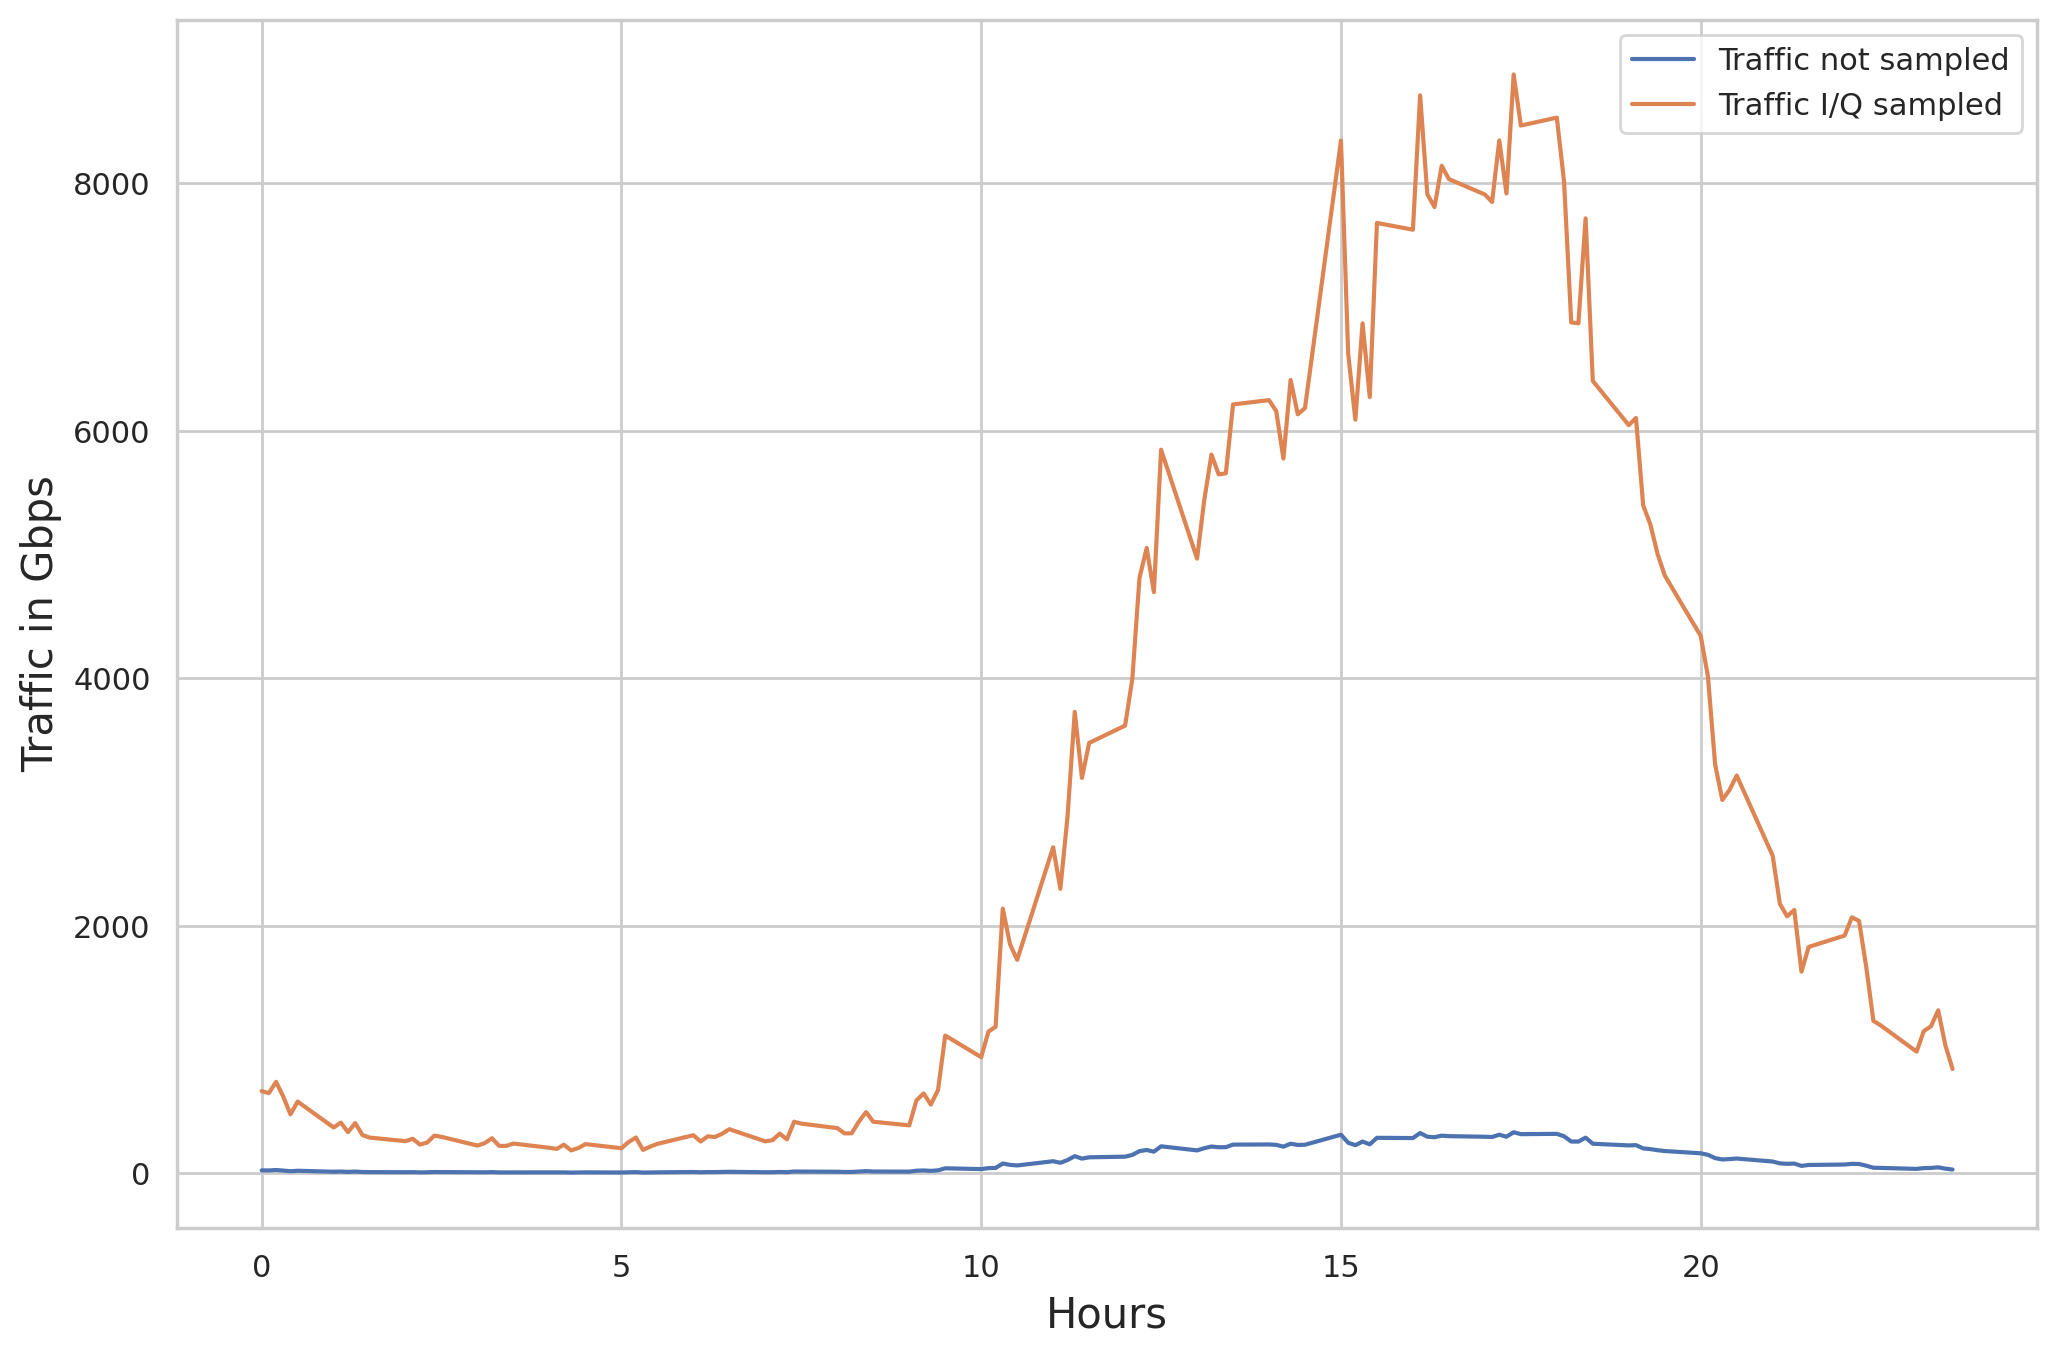

In [216]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(df_largest['Time_Interval'], df_largest['Traffic_Gbps'], label = 'Traffic not sampled')
plt.plot(df_largest['Time_Interval'], df_largest['Fronthaul_Gbps'], label = 'Traffic I/Q sampled')
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)
plt.legend()

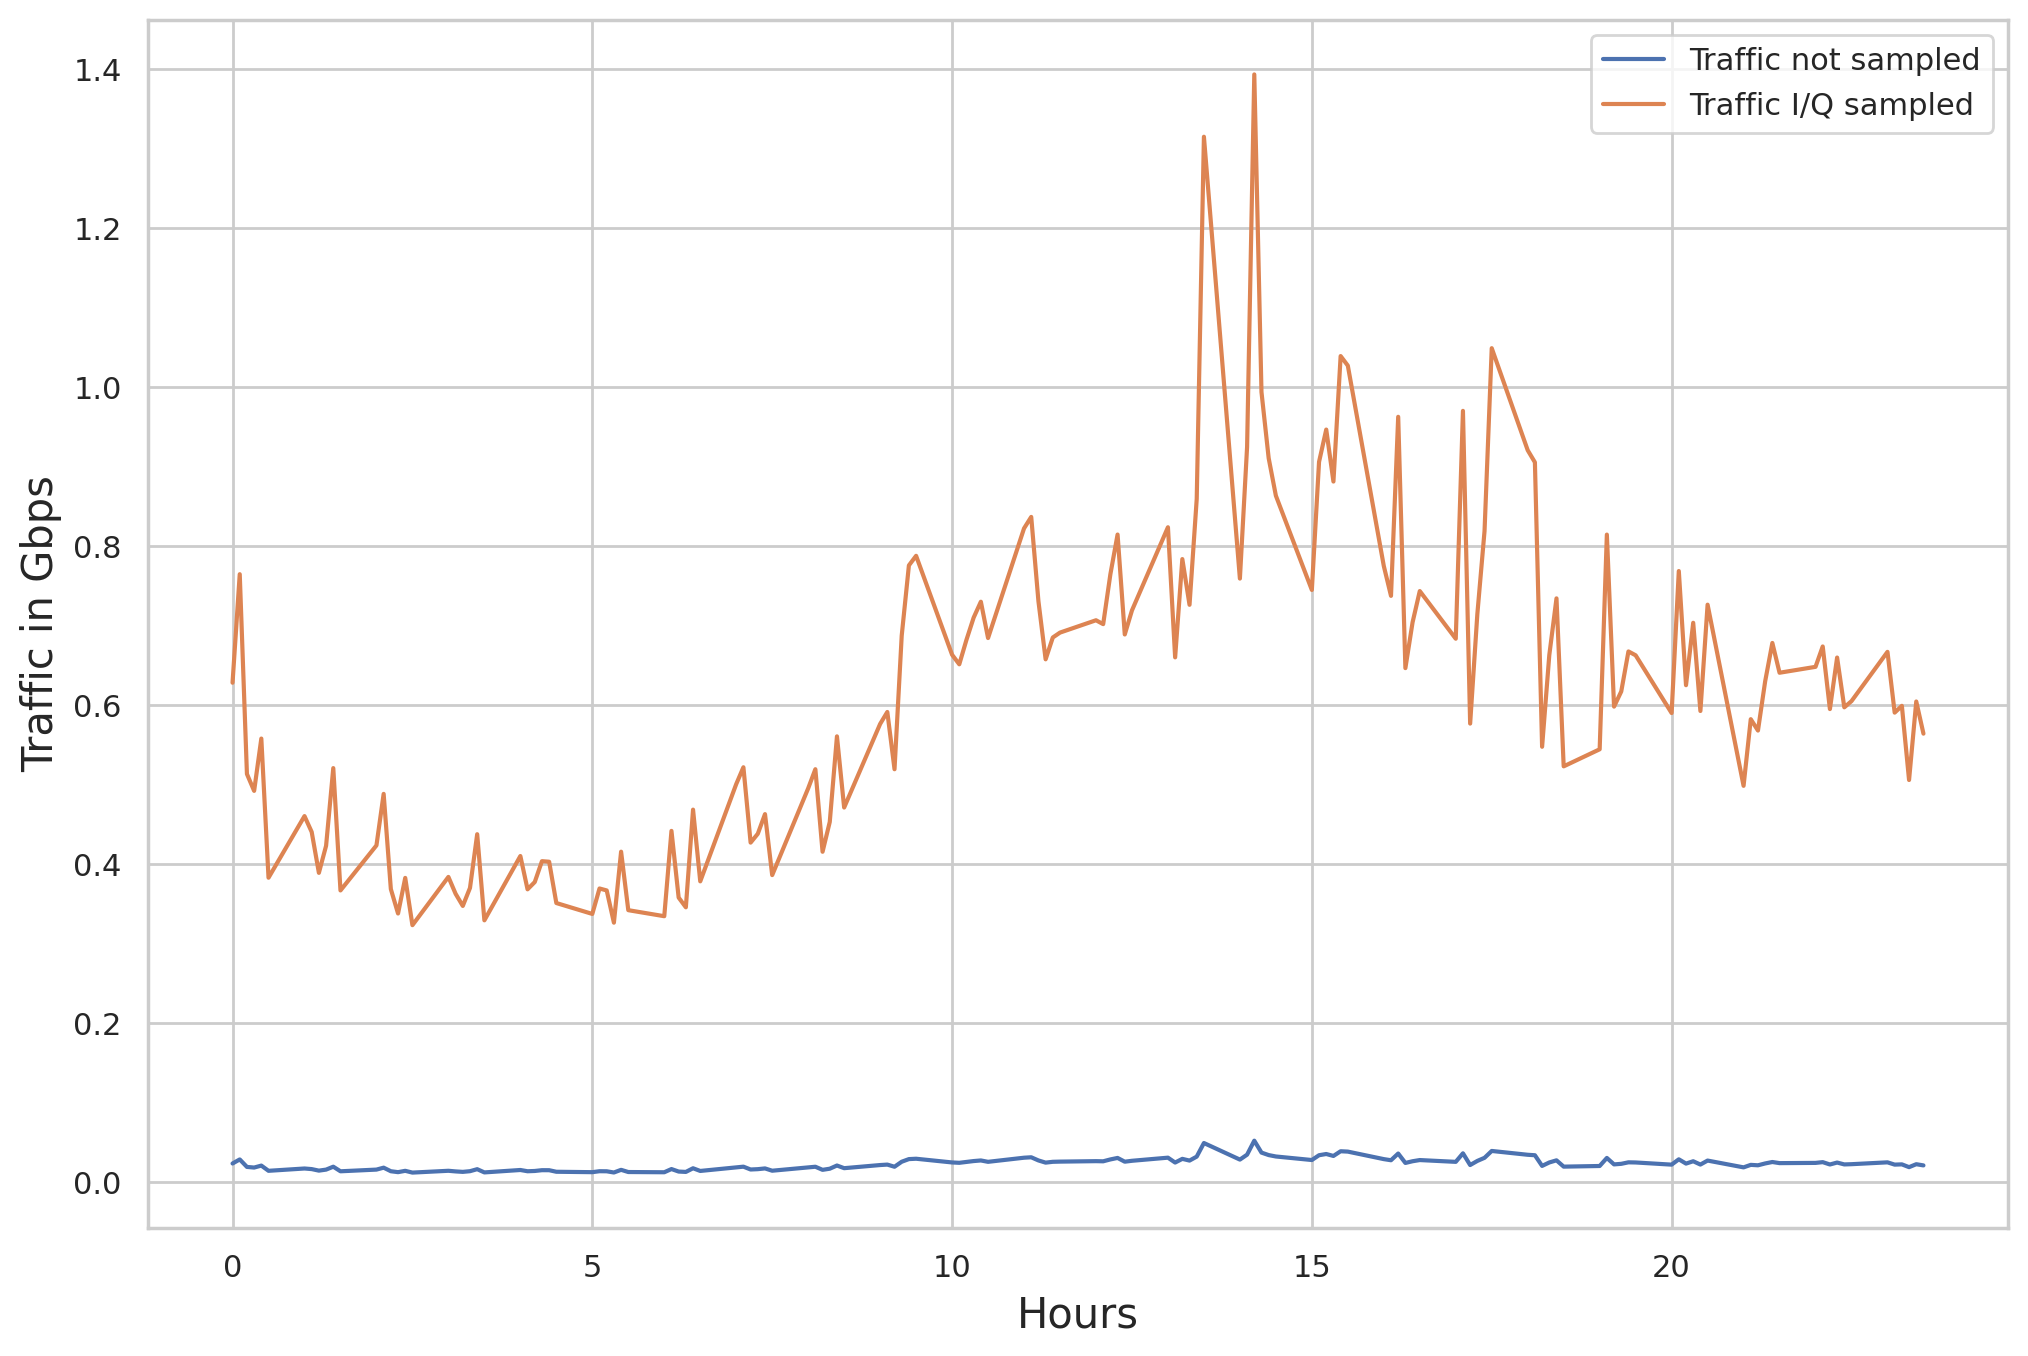

In [217]:
plt.figure(figsize=(12, 8), dpi = 200)
plt.plot(df_smallest['Time_Interval'], df_smallest['Traffic_Gbps'], label = 'Traffic not sampled')
plt.plot(df_smallest['Time_Interval'], df_smallest['Fronthaul_Gbps'], label = 'Traffic I/Q sampled')
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Traffic in Gbps', fontsize = 15)
plt.legend()

We can conclude that the 5G networks will demand a lot of bandwidth from the fronthaul to process baseband functions. The conversion can be eight times higher than demanded in radio form. Only one region might need 8 Tbps! It shows how important it is to get to know the data for network planning. However, the answers have not been answered yet. This dataset can only show traffic from regions, and one cell tower can serve more than one region. So, we need more data! OpencellID is a project that maps the geocoordinates of cell towers around the world. We are going to use that dataset along with the dataset of geolocations of squares in Milan to proceed with our project. Please see Source02.